In [1]:
import seaborn as sns
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt

## Extract results from log files and create a dataframe

In [11]:
p = Path('../results')
method_folder = ['all_drugs_with_error_bar', 'moli']
logfile_name = 'logs.txt'
result_dataframe = pd.DataFrame(columns=['Drug', 'Dataset', 'Auroc', 'Method', 'Time'])
result_path = Path('..', 'results', 'bayesian_optimization')

drug_paths =  [x for x in method_paths[0].iterdir()]
for drug_path in drug_paths:
    drug = drug_path.stem
    for logfile_folder in method_folder:
        method = logfile_folder
        log_path = drug_path / logfile_folder / logfile_name
        if log_path.is_file():
            with open(log_path, 'r') as log_file:
                test_auroc =[]
                extern_auroc = []
                for line in log_file:
                    if 'test Auroc' in line:
                        test_auroc.append(float(line.split("=")[-1].strip()))
                    if 'extern AUROC' in line:
                        extern_auroc.append(float(line.split("=")[-1].strip()))
                    if 'Minutes' in line:
                        time = int(int(line.split(":")[-1].strip()) / 60)
                for auroc in test_auroc:
                    result_dataframe = result_dataframe.append(
                        pd.DataFrame([[drug, 'Test', auroc, method, time]],
                                         columns=['Drug', 'Dataset', 'Auroc', 'Method', 'Time']))
                for auroc in extern_auroc:
                    result_dataframe = result_dataframe.append(
                        pd.DataFrame([[drug, 'Extern', auroc, method, time]],
                                         columns=['Drug', 'Dataset', 'Auroc', 'Method', 'Time']))

In [12]:
result_dataframe = result_dataframe.replace('all_drugs_with_error_bar', 'Holi-MOLI')
result_dataframe = result_dataframe.replace('moli', 'MOLI')
result_dataframe = result_dataframe.replace('Gemcitabine_pdx', 'Gemcitabine with PDX')
result_dataframe = result_dataframe.replace('Gemcitabine_tcga', 'Gemcitabine with TCGA')
result_dataframe.to_csv('results')

## Plot categorical boxplots

In [17]:
result_dataframe[result_dataframe['Dataset'] == 'Extern']

,Drug,Dataset,Auroc,Method,Time
0,Cisplatin,Extern,0.688889,Holi-MOLI,37
0,Cisplatin,Extern,0.686111,Holi-MOLI,37
0,Cisplatin,Extern,0.387500,Holi-MOLI,37
0,Cisplatin,Extern,0.725000,Holi-MOLI,37
0,Cisplatin,Extern,0.680556,Holi-MOLI,37
0,Docetaxel,Extern,0.593750,Holi-MOLI,46
0,Docetaxel,Extern,0.578125,Holi-MOLI,46
0,Docetaxel,Extern,0.640625,Holi-MOLI,46
0,Docetaxel,Extern,0.609375,Holi-MOLI,46
0,Docetaxel,Extern,0.562500,Holi-MOLI,46


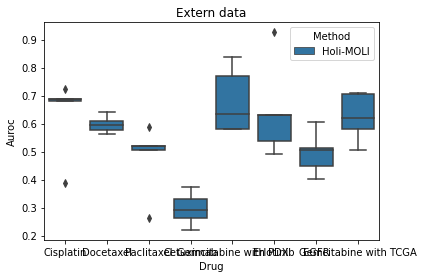

In [13]:
test_results = result_dataframe[result_dataframe['Dataset'] == 'Test']
extern_results = result_dataframe[result_dataframe['Dataset'] == 'Extern']
boxplot_test = sns.boxplot(x='Drug', y='Auroc', hue='Method',  data=test_results)
plt.title('Test data')
plt.savefig('boxplot_test.pdf')
plt.clf()

boxplot_extern = sns.boxplot(x='Drug', y='Auroc', hue='Method',  data=extern_results)
plt.title('Extern data')
plt.savefig('boxplot_extern.pdf')

## Show time differences